In [214]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import RK45, odeint, solve_ivp
from scipy.special import expit
import math

In [220]:
i = 0.0+1.0j; k1 = 1.3*10**12+0.003867934529567439+0j; k2 = 1.3*10**12; k3 = 2.6*10**12; w1 = 10**12; w2 = 3*10**12; w3 = w1 + w2
delta_k1 = 0; d = 10; c = 3*10**8; A2 = 2+0.0j; 

K1 = 2*i*w1**2*d/(k1*c**2)*np.conj(A2)
K3 = 2*i*w3**2*d/(k3*c**2)*A2

delta_k = k1+k2-k3 # 4*kappa


def dA3dz(z,S):
    #Constants above. I made them simple, but will probably need to know reasonable values at one point.
    A1, A3 = S
    return (K1*A3, K3*A1)

def dA3dz2(z, S): #delta_k != 0
    A1, A3 = S
    return (K1*A3*np.exp(-i*delta_k*z),K3*A1*np.exp(i*delta_k*z))

z_max = 10000

delta = 1

A1 = 10000+0.0j
y0 = [A1,0]
y02 = [A1,0]
sol1 = RK45(dA3dz,0.0,y0,z_max, 10, 10)
#sol2 = RK45(dA3dz2,0.0,y02,z_max)
sol2 = solve_ivp(dA3dz2,np.array([0,10000]),y02, t_eval = np.linspace(0,10000,1000))

z = [];
A3_int = []

z2 = sol2.t
A3_int2 = np.abs(sol2.y[1])**2
#z2 = [];
#A3_int2 = []

for i in range(1000):
    sol1.step()
    A3_int.append(np.abs(sol1.y[1])**2)
    z.append(sol1.t) 
    if sol1.status == "finished":
        break
        
#for i in range(1000):
    #sol2.step()
    #A3_int2.append(np.abs(sol2.y[1])**2)
    #z2.append(sol2.t) 
    #if sol2.status == "finished":
        #break



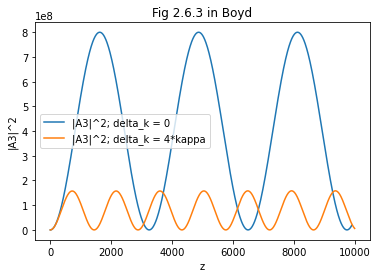

In [224]:
plt.plot(z,A3_int)
plt.plot(z2,A3_int2)
plt.xlabel("z")
plt.ylabel("|A3|^2")
plt.legend(["|A3|^2; delta_k = 0", "|A3|^2; delta_k = 4*kappa"])
plt.title("Fig 2.6.3 in Boyd")
plt.show()